In [2]:
import sys
import numpy  as np
import pandas as pd
import tables as tb

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

import antea.database.load_db as db
import antea.reco.reco_functions as rf

from antea.io.mc_io        import load_mchits
from antea.io.mc_io        import load_mcparticles
from antea.io.mc_io        import load_mcsns_response
from antea.io.mc_io        import load_mcTOFsns_response
from antea.io.mc_io        import read_sensor_bin_width_from_conf
from invisible_cities.core import system_of_units as units

In [9]:
sys.path.append('/Users/carmenromoluque/Analysis/')
from scripts_before_dataframes import analysis_utils as ats

20015


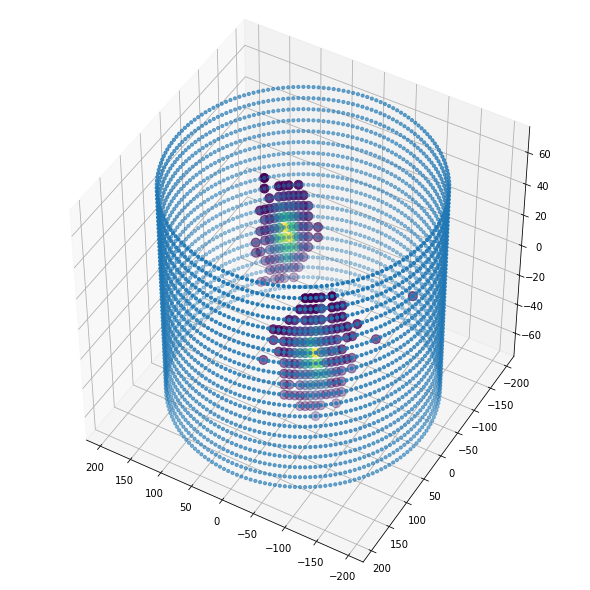

In [13]:
###events: 20015, 20030, 20241, 20315, 20355, 20404, 20433, 20505, 20514, 20677, 20702, 20752, 20995

eventsPath   = '/Users/carmenromoluque/nexus_petit_analysis/PETit-ring/DAQ_antea'
file_name    = 'petit_ring_tof_all_tables'
rpos_file    = '/Users/carmenromoluque/Analysis/scripts_before_dataframes/r_sigma_phi_table_irad165mm_depth3cm_thr4pes_no_compton.h5'
Rpos         = ats.load_rpos(rpos_file, group="Radius", node=f"f4pes150bins")
DataSiPM     = db.DataSiPM('petalo', 0)
DataSiPM_idx = DataSiPM.set_index('SensorID')

thr_r   = 4
thr_phi = 5
thr_z   = 4
thr_e   = 2

c0 = c1 = c2 = c3 = c4 = 0

start, numb = 1, 1 
time_diff = []
pos_cart1 = []
pos_cart2 = []
event_ids = []

ave_speed_in_LXe = 0.210 # mm/ps
speed_in_vacuum  = 0.299792458 # mm/ps

filename  = f"{eventsPath}/{file_name}.001.pet.h5"
sns_response = load_mcsns_response(filename)

sns_response_tof = load_mcTOFsns_response(filename)
particles        = load_mcparticles(filename)
hits             = load_mchits(filename)

events = particles.event_id.unique()

sipms         = DataSiPM_idx.loc[sns_response.sensor_id]
sns_ids       = sipms.index.values
sns_positions = np.array([sipms.X.values, sipms.Y.values, sipms.Z.values]).transpose()

charge_range = (1000, 1400)

for evt in events[15:16]:
    evt_sns = sns_response[sns_response.event_id == evt]
    evt_sns = rf.find_SiPMs_over_threshold(evt_sns, threshold=2)
    if len(evt_sns) == 0:
        continue

    evt_parts = particles[particles.event_id       == evt]
    evt_hits  = hits[hits.event_id                 == evt]
    evt_tof   = sns_response_tof[sns_response_tof.event_id == evt]

    pos1, pos2, q1, q2, _, _, _, _, min_id1, min_id2, min_tof1, min_tof2 = rf.reconstruct_coincidences(evt_sns, evt_tof, charge_range, DataSiPM_idx, evt_parts, evt_hits)
    
    if len(pos1) and len(pos2):
        print(evt)
    fig = plt.figure(figsize=(8,8))
    ax  = Axes3D(fig)
    pos1_x = np.array([p[0] for p in pos1])
    pos1_y = np.array([p[1] for p in pos1])
    pos1_z = np.array([p[2] for p in pos1])
    pos2_x = np.array([p[0] for p in pos2])
    pos2_y = np.array([p[1] for p in pos2])
    pos2_z = np.array([p[2] for p in pos2])
    ax.scatter(DataSiPM.X.values, DataSiPM.Y.values, DataSiPM.Z.values, marker='o', s=10)
    ax.scatter(pos1_x, pos1_y, pos1_z, c=q1, marker='o', s=80)
    ax.scatter(pos2_x, pos2_y, pos2_z, c=q2, marker='o', s=80)
    ax.view_init(azim=120, elev=45)

In [4]:
keys         = np.array(['event_id', 'sensor_id', 'time_bin', 'charge'])
df = pd.DataFrame({}, columns=keys)
df

,event_id,sensor_id,time_bin,charge


In [10]:
df.time_bin.min()

nan

In [9]:
min_df = df[df.time_bin == min_t]

In [12]:
z = np.arange(3, dtype=np.uint8)
x = -z

array([  0, 255, 254], dtype=uint8)